# [IAPR][iapr]: Project


**Group ID:** 02

**Author 1 (sciper):** Basile Spaenlehauer (272570)  
**Author 2 (sciper):** Victor Herrmann (284552)  
**Author 3 (sciper):** Abed Alrahman Shabaan (237731)  

**Release date:** 07.05.2021  
**Due date:** 03.06.2021 (23h59) 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Introduction

An anonymous researcher that we will name Lann Yecun is convinced that the MNIST dataset still has great potential. He decides to create a playing card game based on MNIST digits and different figures. The game uses a standard 52 card deck which is composed of four French suits/colours: clubs (&#9827;), diamonds (&#9830;), hearts (&#9829;) and spades (&#9824;). Each suit includes 10 digit cards (from 0 to 9) and 3 figures (Jack-J, Queen-Q, and King-K). Here is an example of the 13 spade cards with their name.


<img src="media/example_cards.png">


We can find the same arrangement of cards for the clubs, diamonds, and hearts. 


## 1. Rules


### 1.1 Standard

The rules are based on the simple battle card game. The goal of the game is to win as many points as possible. Each turn, the 4 players play a card in front of them. As displayed in the example below. The rules are the following:

- The cards are ranked in the following order : **0 < 1 < 2 < 3 < 4 < 5 < 6 < 7 < 8 < 9 < J < Q < K**.
- The player with the highest-ranked card wins the round and obtains **1 point**. 
- If the highest-ranked card is the same for multiple players we call it a draw and all winners get **1 points**. 
- In this configuration, we **do not** take into account the suits. The game only rely on the card ranks. 
- The game lasts 13 rounds. After the last round, the winner is the player that has the largest number of points. 
- In the example below Player 1 wins the round with his Queen ( 0 < 8 < J < **Q**).

If two or more players have the same number of points they share the victory.

### 1.2 Advanced

The advanced rules take into account the suits. 

- At the beginning of **each round** a random player is designated as the **dealer**. The dealer places a green token with the letter *D* next to him (player 1 in the example below).
- Only the cards that belong to the same suit as the one of the dealer are considered valid. In the example below, only Player 4 is competing with Player 1 as spade was selected by the dealer (e.i., Player 1). Player 2 and 3 are out for this round. Player 1 wins the round and **1 point** with the Queen ( 0&#9824; < **Q&#9824;**).
- There cannot be any draw between the players as they are not any card duplicates.
- We use the same system as the standard method to count the points.


### 1.3 Notes

- The orientation of the card is linked to the position of the player around the table. For instance, to read the card of the 3rd player you will have to rotate it by 180°.
- The **digits** always **face** the players around the table. The figures can have random orientations.
- Player 1 **always** seats south of the table. The players are **always** ordered counter-clockwise as in the example. 
- The dealers can change between the rounds and games.
- Some cards might apear multiple times per game.

<img src="media/example_round.jpg">


---
## 2. Data

You will be given the images of 7 games that were played ([download link](https://drive.google.com/file/d/1lsCMEwc00nsBMVrzo0NE1np79dMeShqZ/view?usp=sharing)). The data are composed of:
   - 7 folder named after the games (game1 to game7).
   - Each game includes 13 ordered images (1st to 13th round).
   - Each game includes a csv file with the ground truth of the game. The first row list the players (P1 to P4) as well as the dealer (D). The following rows represent the rounds (1 to 13). We represent the card played with 2 character as $AB$ where $A \in [0-9, J, Q, K]$ is the rank of the card and $B \in [C, D, H, S]$ is the suit. For example, QS means "(Q)ueen of (S)pade". The dealer is represented by the ID of the player (e.g. P1 -> 1).
   
You are free to use external datasets such as the original MNIST train set that you used in lab 3.

---
## 3. Your Tasks

Your task is to ready yourself for the final evaluation. The day of the exam we will give you a new folder with a new game. ! The digits on the cards might sligthly **differ** from the one of the traning set. When given a new data folder with 13 images your should be able to:

**Task 0**
   - Plot an overlay for each "round image" that shows your detections and classification. You can for example plot bounding boxes around the cards/dealer token and add a text overlay with the name of the classes.

**Task 1**
   - (a) Predict the **rank** of the card played by each player at each round (Standard rules).
   - (b) Predict the **number of points** of each player according to **Standard** rules
 
**Task 2**
   - (a) Detect which player is the selected **dealer** for each round.
   - (b) Predict the **rank** and the **suit** of the card played by each player at each round (Advanced rules).
   - (c) Predict the **number of points** of each player according to **Advanced** rules


You will have to upload your code on moodle **the day before** the exam.

We will ask you to run your pipeline in realtime and to send us your prediction of task 1 and 2 obtain with the function **print_results**. On our side we will compute the perfomance of your classification algorithm. To evaluate your method we will use the **evaluate_game** function presented below. To understant how the provided functions work please read the documentation of the functions in **utils.py**.

**Please make sure your function returns the proper data format to avoid points penalty the day of the exam**. 

### 3.1 Example Final results

Example of output you **should** provide the day of the final exam.

In [1]:
from utils import print_results
import numpy as np

# Creates dummy predictions (toy exmaple)
pred_rank = np.array(["0D"]*4*13).reshape((13, 4)) # Everyone played the "0 of spade".
pred_dealer = [1]*13                # List of players selected as dealer for each round
pred_pts_stand = [0,0,0,13]         # Player 4 won 13 points with standard rules.
pred_pts_advan = [0,0,8,7]          # Player 3 and 4 won 8 and 7 points with adv, rules respectively.

print_results(
    rank_colour=pred_rank, 
    dealer=pred_dealer, 
    pts_standard=pred_pts_stand,
    pts_advanced=pred_pts_advan,
)

The cards played were:
[
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
['0D', '0D', '0D', '0D'], 
]
Players designated as dealer: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Players points (standard): [0, 0, 0, 13]
Players points (advanced): [0, 0, 8, 7]


### 3.2 Example Accuracy

Example of code you can use to validate the performance of your model. Be careful the day of the exam you will not have access to the ground truth of the predictions.

In [2]:
from utils import evaluate_game
import pandas as pd
#! You will need pandas libary to run the example. Please install the package using pip or conda commands !

# Load ground truth from game 1
cgt = pd.read_csv('train_games/game1/game1.csv', index_col=0)
cgt_rank = cgt[['P1', 'P2', 'P3', 'P4']].values

# Compute accuracy of prediction
acc_standard = evaluate_game(pred_rank, cgt_rank, mode_advanced=False)
acc_advanced = evaluate_game(pred_rank, cgt_rank, mode_advanced=True)
print("Your model accuracy is: Standard={:.3f}, Advanced={:.3f}".format(acc_standard, acc_advanced))

Your model accuracy is: Standard=0.077, Advanced=0.019


## 4. Solution


### Import libraries

In [3]:
%matplotlib inline

import vision_tools
import cnn

import importlib

import os

import skimage.io

from skimage.measure import label
from scipy.ndimage import gaussian_laplace
from scipy.signal import convolve2d
from scipy.ndimage.morphology import binary_dilation
from skimage.morphology import disk

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import math
import numpy as np



### Import a test image

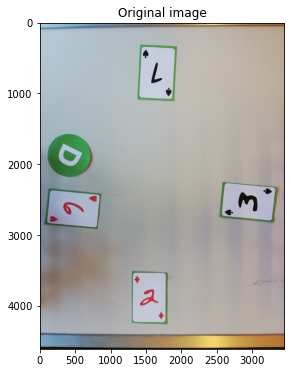

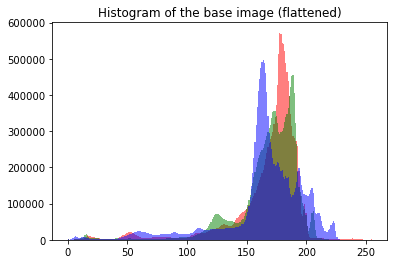

In [4]:
importlib.reload(vision_tools)
folder = 'train_games/game5'
file = '2.jpg'

# Load image
f_name = os.path.join(folder, file)
im_uint8 = skimage.io.imread(f_name)
im = im_uint8.astype('int')

# Display the image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(im)
plt.title('Original image')
plt.show()

# Display channels distinctively
plt.hist(im[...,0].flatten(), bins=256, color='r', alpha=0.5)
plt.hist(im[...,1].flatten(), bins=256, color='g', alpha=0.5)
plt.hist(im[...,2].flatten(), bins=256, color='b', alpha=0.5)
plt.title('Histogram of the base image (flattened)')
plt.show()

### Apply a filter to have only one channel

The objective is to separate the green of the border of the cards and the dealer from the other colors.

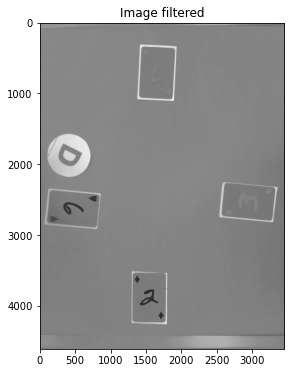

In [5]:
im_green = 2 * im[:, :, 1] - im[:, :, 0] - im[:, :, 2]

# Display the image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(im_green, cmap="gray")
plt.title('Image filtered')
plt.show()

### Creation of  a mask to find the dealer

First, we apply a high pass filter to conserve only the border of the cards and the dealer. Then we apply a threshold and finally we apply a mask to remove the reflections on the top and the bottom of the image.

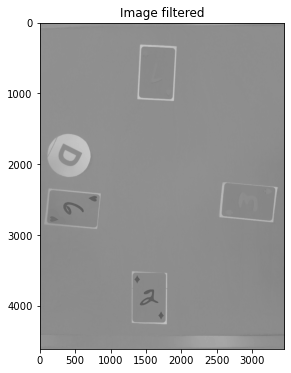

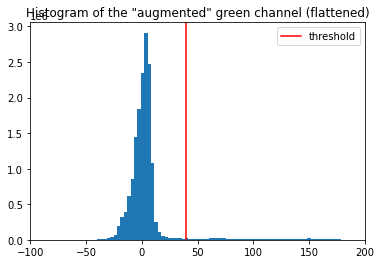

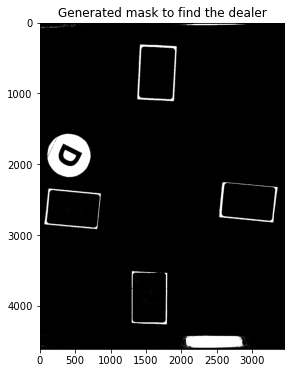

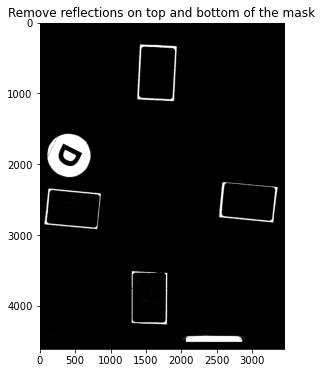

In [6]:
hp_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
im_filtered = convolve2d(im_green, hp_filter, mode='same')

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(im_filtered, cmap="gray")
plt.title('Image filtered')
plt.show()

# threshold
threshold = 40
dealer_mask = (im_filtered > threshold)


plt.hist(im_filtered.flatten(), bins=256)
plt.axvline(threshold, c='r', label='threshold')
plt.title('Histogram of the "augmented" green channel (flattened)')
plt.legend()
plt.xlim((-100,200))
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(dealer_mask, cmap="gray")
plt.title('Generated mask to find the dealer')
plt.show()

# exclusion mask
EXCLUDE_MARGIN_TOP = 100
EXCLUDE_MARGIN_BOTTOM = 100
im_height, im_width = im.shape[:2]
exclusion_mask = np.ones((im_height, im_width))
y_excl_bot = im_height - EXCLUDE_MARGIN_BOTTOM
y_excl_top = EXCLUDE_MARGIN_TOP
exclusion_mask[y_excl_bot:, :] = 0
exclusion_mask[:y_excl_top, :] = 0

dealer_mask = dealer_mask * exclusion_mask

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(dealer_mask, cmap="gray")
plt.title('Remove reflections on top and bottom of the mask')
plt.show()

### Detection of the dealer

First we label all objects on the mask, then we find the biggest object (in number of pixels) and we assume that it is the dealer. Then, we compute the center of the dealer coin and find the closest player (represented by the red dots below). We export who is the dealer player and the position of the dealer coin to mask it after when we want to extract the cards.

In [7]:
def extract_rectangle(im_label_mask, retained_item):
    """
    Extract interesting object properties
    :param im_label_mask: image labels matrix
    :param retained_item: value of label for the object
    :param player_pos: list of player positions
    :param verbose: verbose mode
    :return:
    """
    # coordinates of the points belonging to this item
    coords_y, coords_x = np.where(im_label_mask == retained_item)
    top = coords_y.min()
    right = coords_x.max()
    bot = coords_y.max()
    left = coords_x.min()

    # xy anchor for plt Rectangle patch
    anchor = (left, top)
    width = right - left
    height = bot - top
    rect_plt = (anchor, width, height)
    return (top, right, bot, left), rect_plt

def dist_eucl(a, b):
    """
    Euclidean distance
    :param a: point a
    :param b: point b
    :return: euclidean distance between a and b
    """
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

Number of object: 2015
Dealer player is: player 4


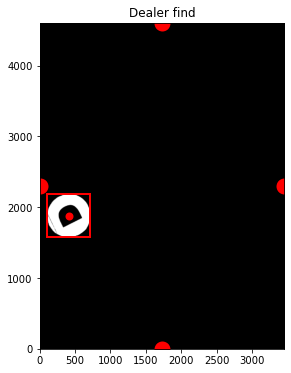

In [8]:
im_label_mask, num_items = label(dealer_mask, return_num=True)

print("Number of object:", num_items)

size_items = np.unique(im_label_mask, return_counts=True)

# remove background
size_items = np.delete(size_items, 0, axis=1)

# compute dealer index (biggest area of pixels)
dealer_index = size_items[0][np.argmax(size_items[1])]

# compute rectangle around dealer shape
rect = extract_rectangle(im_label_mask, dealer_index)
d_rect, plt_rect = rect

# compute dealer shape's center
c_x = plt_rect[0][0] + plt_rect[1] // 2
c_y = plt_rect[0][1] + plt_rect[2] // 2

# define player positons on the center of each border
im_height, im_width = dealer_mask.shape
p_pos = [(im_width // 2, im_height),  # 1
         (im_width, im_height // 2),  # 2
         (im_width // 2, 0),  # 3
         (0, im_height // 2)]  # 4

dealer_num = np.argmin([dist_eucl((c_x, c_y), p) for p in p_pos]) + 1
print("Dealer player is: player", dealer_num)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow((im_label_mask == dealer_index), cmap="gray")
plt.title('Dealer find')
plt.scatter(c_x, c_y, color = "red", linewidths=2)
for i in range(4):
    plt.scatter(p_pos[i][0], p_pos[i][1], color = "red", linewidths=10)
plt.fill((d_rect[3],d_rect[1],d_rect[1],d_rect[3]),(d_rect[0],d_rect[0],d_rect[2],d_rect[2]), facecolor='none', edgecolor='red', linewidth=2)
plt.xlim((0,im_width))
plt.ylim((0,im_height))
plt.show()

### Creation of  a mask to find the cards

We apply a Laplacian of Gaussian filter to only conserve the card's borders and then we apply a threshold on the image. Then we remove the top and bottom part of the mask to avoid reflection on the metal and we remove the dealer coin. Finally, we apply a dilation on the mask to be sure that the border of the cards are continuous.

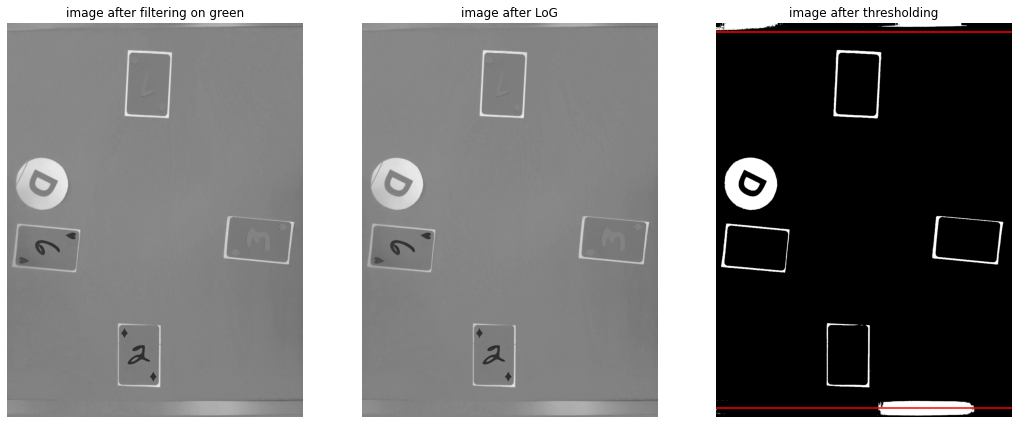

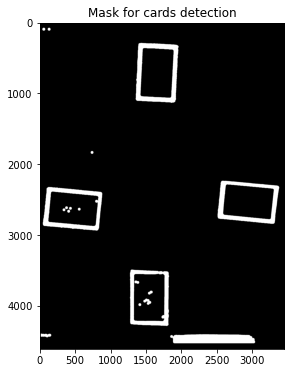

In [9]:
# filter with a LoG
im_filtered = gaussian_laplace(im_green, 0.3) * (-1)

# normalize
im_filtered = im_filtered / im_filtered.max()
im_filtered *= 255

# threshold
threshold = 30
mask = (im_filtered > threshold)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 8))
ax1.imshow(im_green, cmap='gray')
ax1.set_title('image after filtering on green')
ax1.axis('off')
ax2.imshow(im_filtered, cmap='gray')
ax2.set_title('image after LoG')
ax2.axis('off')
ax3.imshow(mask, cmap='gray')
ax3.set_title('image after thresholding')
ax3.axis('off')
l=(y_excl_top, y_excl_bot)
for y in l:
    plt.axhline(y, c='r')
plt.show()

# suppress reflection
mask = mask * exclusion_mask

# remove dealer coin
(top, right, bottom, left) = d_rect
MARGIN_DLR = 20
mask[top - MARGIN_DLR:bottom + MARGIN_DLR, left - MARGIN_DLR:right + MARGIN_DLR] = 0

# dilate the cards borders to fill any gaps
mask = binary_dilation(mask, structure=disk(20))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(mask, cmap="gray")
plt.title('Mask for cards detection')
plt.show()

Now that we have some thick borders to work with, we can label them, identify the ones that have the most pixels and compute to which player they belong. We may get some false positives here with the big shadow at the bottom, so the next step is to determine which suggested card is actually the player's card. For this we compute the total area of the suggested card and we associate the biggest one to the player. This way the cards should always be taken over some shadowed areas.

In [10]:
def extract_obj_prop(im_label_mask, retained_item, player_pos=None, verbose=False):
    """
    Extract interesting object properties
    :param im_label_mask: image labels matrix
    :param retained_item: value of label for the object
    :param player_pos: list of player positions
    :param verbose: verbose mode
    :return:
    """
    # coordinates of the points belonging to this item
    coords_y, coords_x = np.where(im_label_mask == retained_item)
    top = coords_y.min()
    right = coords_x.max()
    bot = coords_y.max()
    left = coords_x.min()

    # xy anchor for plt Rectangle patch
    anchor = (left, top)
    width = right - left
    height = bot - top
    rect = (anchor, width, height)

    #  Center point of the item
    center_x, center_y = coords_x.mean(), coords_y.mean()

    # decide which player it is
    player_num = np.argmin([dist_eucl((center_x, center_y), p) for p in player_pos]) + 1
    if verbose:
        print(f'center of the card : ({center_x:.2f}, {center_y:.2f})')
        print(f'anchor : {rect[0]}\nwidth : {rect[1]}\nheight : {rect[2]}')
        print(f'player : {player_num}')
        print('-' * 30)
    return rect, player_num

center of the card : (1648.58, 710.13)
anchor : (1349, 294)
width : 606
height : 845
player : 3
------------------------------
center of the card : (2923.67, 2547.92)
anchor : (2505, 2236)
width : 870
height : 607
player : 2
------------------------------
center of the card : (446.42, 2631.03)
anchor : (39, 2324)
width : 839
height : 615
player : 4
------------------------------
center of the card : (1549.80, 3900.57)
anchor : (1269, 3488)
width : 552
height : 795
player : 1
------------------------------
center of the card : (2438.68, 4466.17)
anchor : (1836, 4400)
width : 1199
height : 127
player : 1
------------------------------
Surfaces for potential player 0: [438840, 152273]


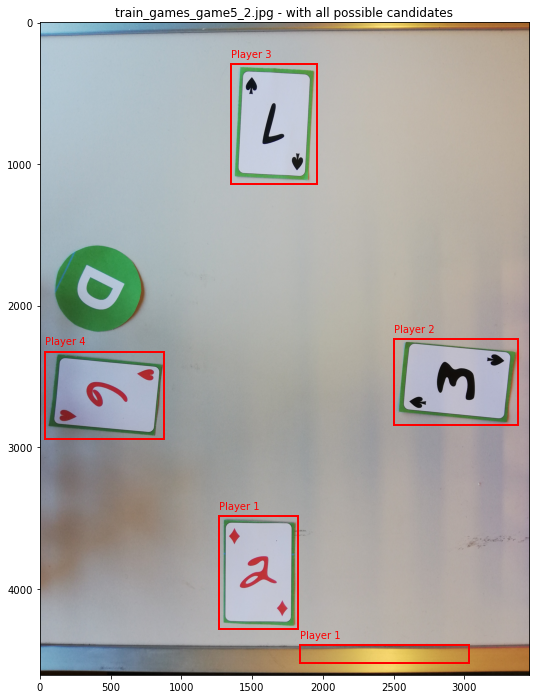

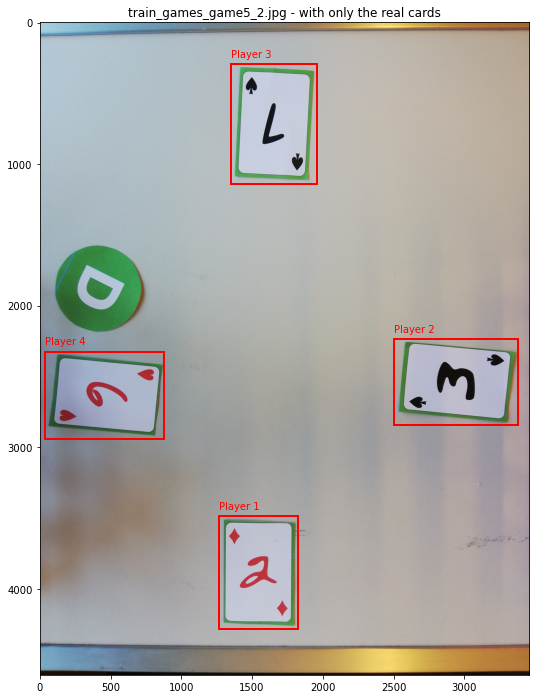

In [11]:
file_name = os.path.join(folder, file).replace('\\', '_').replace('/', '_')
im_label_mask, num_items = label(mask, return_num=True)

im_height, im_width = mask.shape

# define player positons on the center of each border
p_pos = [(im_width // 2, im_height),  # 1
         (im_width, im_height // 2),  # 2
         (im_width // 2, 0),  # 3
         (0, im_height // 2)]  # 4

# extract each features characteristics
rects = []
retained_items = []
num_pixs = []
role = []
for i in range(num_items):
    pix_num = (im_label_mask == i + 1).sum()
    if pix_num > 10000:
        # items that are big enough
        retained_item = i + 1
        rect, p_id = extract_obj_prop(im_label_mask, retained_item, p_pos,
                                      verbose=True)
        rects.append(rect)
        retained_items.append(retained_item)
        num_pixs.append(pix_num)
        role.append(p_id)

ANCHOR = 0
WIDTH = 1
HEIGHT = 2
plt.figure(figsize=(24, 12))
for i, (idx, rect) in enumerate(zip(retained_items, rects)):
    rect_patch = Rectangle(*rect, fill=False, lw=2, ec='r')
    plt.gca().add_patch(rect_patch)
    anchor = list(rect[ANCHOR])
    anchor[1] -= 50  # offset anchor
    plt.annotate(f'Player {role[i]}', anchor, c='r')
plt.imshow(im)
plt.title(f'{file_name} - with all possible candidates')
plt.show()

# check that there is only one player with the same number
role_copy = role
rects_copy = rects
for p_id in range(4):
    index_with_role = [i for i, v in enumerate(role) if v == p_id + 1]
    if len(index_with_role) > 1:
        surf = [r[WIDTH] * r[HEIGHT] for r in [rects[i] for i in index_with_role]]
        print(f'Surfaces for potential player {p_id}:', surf)
        index_to_keep = index_with_role[np.argmax(surf)]
        for i in index_with_role[::-1]:
            if i != index_to_keep:
                del retained_items[i]
                del rects_copy[i]
                del num_pixs[i]
                del role_copy[i]
role = role_copy
rects = rects_copy

# plot the bounding-boxes
plt.figure(figsize=(24, 12))
for i, (idx, rect) in enumerate(zip(retained_items, rects)):
    rect_patch = Rectangle(*rect, fill=False, lw=2, ec='r')
    plt.gca().add_patch(rect_patch)
    anchor = list(rect[ANCHOR])
    anchor[1] -= 50  # offset anchor
    plt.annotate(f'Player {role[i]}', anchor, c='r')
plt.imshow(im)
plt.title(f'{file_name} - with only the real cards')
plt.show()

Now we extract the cards by slicing the full image with the extracted rectangles. Then applying rotations as necessary. Finally, we use a special filter that lets us segment the cards independantly of their clor (red or black).

In [12]:
def convert_to_gray_scale(im):
    """
    Special Gray filter to make red be like black but eliminating the white component
    :param im: input image (RGB)
    :return: segmentation ready image
    """
    g_img = np.abs(-0.2 * im[:, :, 0] + 0.7 * im[:, :, 1] + 0.1 * im[:, :, 2])
    return g_img

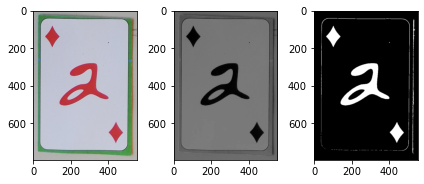

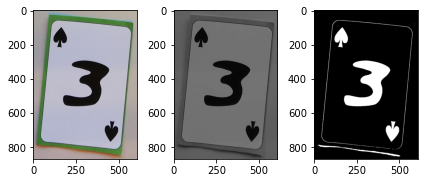

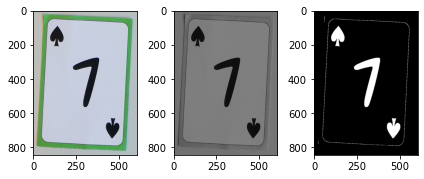

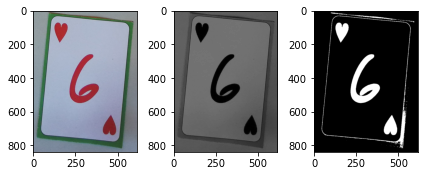

In [13]:
cards = []
for i in range(4):
    idx_player = role.index(i + 1)
    if idx_player is None:
        cards.append([])
        print(f'Player {i + 1} was not detected')
        continue

    anchor, r_width, r_height = rects[idx_player]
    top = anchor[1]
    bottom = anchor[1] + r_height
    left = anchor[0]
    right = anchor[0] + r_width
    card = im[top:bottom, left: right, :]

    # apply rotations
    if i == 1:  # rotate clock wise 90°
        card = np.transpose(card[::-1, ...], (1, 0, 2))
    elif i == 2:  # rotate 180°
        card = card[::-1, ::-1, :]
    elif i == 3:  # rotate -90°
        card = np.transpose(card, (1, 0, 2))[::-1, ...]

    cards.append(card)
    g_card = convert_to_gray_scale(card)
    plt.subplot(131)
    plt.imshow(card, vmin=0, vmax=255)
    plt.subplot(132)
    plt.imshow(g_card, cmap='gray', vmin=0, vmax=255)
    plt.subplot(133)
    plt.imshow(g_card < 50, cmap='gray')
    plt.tight_layout()
    plt.show()


### Train a new classifier

In [14]:
importlib.reload(cnn)
model, hist, encoders = cnn.train_new_classifier('./results/masks/', verbose=True, save=False, validate=True, validation_game=6)

Current device: cuda
Validating? True
Creating Tensors
Starting training
Epoch 0, loss = 0.19, symbol train accuracy = 5.13%, suit train accuracy = 26.28% validation loss = 0.23, symbol val accuracy = 7.69%, suit val accuracy = 25.00%
Epoch 1, loss = 0.21, symbol train accuracy = 13.46%, suit train accuracy = 22.44% validation loss = 0.19, symbol val accuracy = 26.92%, suit val accuracy = 25.00%
Epoch 2, loss = 0.16, symbol train accuracy = 25.96%, suit train accuracy = 28.85% validation loss = 0.17, symbol val accuracy = 21.15%, suit val accuracy = 34.62%
Epoch 3, loss = 0.12, symbol train accuracy = 50.32%, suit train accuracy = 30.77% validation loss = 0.12, symbol val accuracy = 51.92%, suit val accuracy = 38.46%
Epoch 4, loss = 0.12, symbol train accuracy = 46.79%, suit train accuracy = 40.71% validation loss = 0.20, symbol val accuracy = 19.23%, suit val accuracy = 40.38%
Epoch 5, loss = 0.17, symbol train accuracy = 28.85%, suit train accuracy = 49.36% validation loss = 0.37, sy

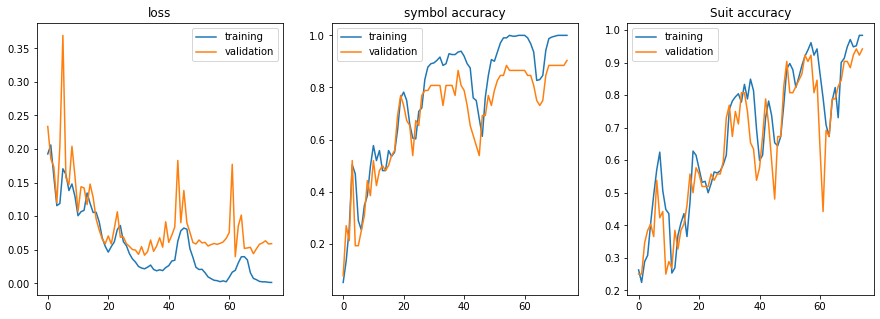

In [15]:
_, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(hist['loss'])
ax[0].plot(hist['val_loss'])
ax[0].set_title('loss')
ax[0].legend(['training', 'validation'])

ax[1].plot(hist['sym_acc'])
ax[1].plot(hist['val_sym_acc'])
ax[1].set_title('symbol accuracy')
ax[1].legend(['training', 'validation'])

ax[2].plot(hist['suit_acc'])
ax[2].plot(hist['val_suit_acc'])
ax[2].set_title('Suit accuracy')
ax[2].legend(['training', 'validation'])
plt.savefig('model_perf_val.png')
plt.show()

### Load a pretrained classifier
To save time, we saved a pre-trained version of the classifier that can be loaded using the cell below

In [16]:
importlib.reload(cnn)
model, encoders = cnn.load_trained_model()

print(model)
print()
print(encoders)

Classifier(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    

Predict a round's cards and dealer using the (pre)trained model

In [19]:
images, dealer = vision_tools.card_pipeline('./train_games/game2/','4.jpg', plot=True, verbose=False, save=False)
predictions = cnn.predict_round(model, encoders, images)
print(f'{predictions} and the dealer is player {dealer[0]}')



['5C', '1C', '5D', '0C'] and the dealer is player 4


### Compute the number of points


In [20]:
def compute_pts(rank_colour, dealer):
    pts_standard = [0, 0, 0, 0]
    pts_advanced = [0, 0, 0, 0]

    for i in range(np.shape(rank_colour)[0]):
        curr_round_std = [0, 0, 0, 0]
        curr_round_adv = [0, 0, 0, 0]
        dealer_suit = rank_colour[i,dealer[i]-1][1]
        for j in range(np.shape(rank_colour)[1]):
            if rank_colour[i,j][0] == 'J':
                curr_round_std[j] = 10
                curr_round_adv[j] = 10
            elif rank_colour[i,j][0] == 'Q':
                curr_round_std[j] = 11
                curr_round_adv[j] = 11
            elif rank_colour[i,j][0] == 'K':
                curr_round_std[j] = 12
                curr_round_adv[j] = 12
            else:
                curr_round_std[j] = int(rank_colour[i,j][0])
                curr_round_adv[j] = int(rank_colour[i,j][0])
            if rank_colour[i,j][1] != dealer_suit:
                curr_round_adv[j] = -1
        for j in np.flatnonzero(curr_round_std == np.max(curr_round_std)).tolist():
            pts_standard[j] += 1
        pts_advanced[np.argmax(curr_round_adv)] += 1
    return pts_standard, pts_advanced


In [21]:
a = np.array(["0D"]*4*13).reshape((13, 4))
a = np.array([["1D", "QC", "5S", "JD"],
             ["5S", "JS", "9C", "KD"],
             ["1D", "3H", "7C", "3D"],
             ["1S", "JD", "4S", "4C"],
             ["0D", "6S", "3C", "2C"],
             ["8S", "9D", "3S", "KS"],
             ["4D", "7H", "7D", "6H"],
             ["0C", "KC", "9S", "8C"],
             ["5D", "5H", "1H", "7S"],
             ["QH", "QC", "6D", "9H"],
             ["4H", "2D", "JC", "QD"],
             ["6C", "8D", "2H", "KH"],
             ["1C", "5C", "0H", "2S"]])

dealer = [1, 2, 3, 4, 2, 4, 1, 3, 3, 2, 1, 4, 4]

print(a)
print(compute_pts(a, dealer))



[['1D' 'QC' '5S' 'JD']
 ['5S' 'JS' '9C' 'KD']
 ['1D' '3H' '7C' '3D']
 ['1S' 'JD' '4S' '4C']
 ['0D' '6S' '3C' '2C']
 ['8S' '9D' '3S' 'KS']
 ['4D' '7H' '7D' '6H']
 ['0C' 'KC' '9S' '8C']
 ['5D' '5H' '1H' '7S']
 ['QH' 'QC' '6D' '9H']
 ['4H' '2D' 'JC' 'QD']
 ['6C' '8D' '2H' 'KH']
 ['1C' '5C' '0H' '2S']]
([1, 7, 2, 5], [1, 4, 3, 5])


# Cell for the test
In doubt? Just run the following cell during the test after filling the folder name

In [1]:
%%time
import cnn
import vision_tools
import utils
import numpy as np
from tqdm import tqdm
import importlib
importlib.reload(cnn)
importlib.reload(vision_tools)

folder = 'train_games/game7' #  Fill this
predictions = []
dealers = []
# model, encoders = cnn.load_trained_model()
model, encoders = cnn.load_trained_model(cuda=False)

for i in tqdm(range(1,14)):
    file = f'{i}.jpg'
    im, cards, dealer = vision_tools.card_pipeline(folder, file, verbose=False, plot=False, save=False, show=False)
    dealers.append(dealer[0])
    round_predictions = cnn.predict_round(model, encoders, cards[0])
    predictions.append(round_predictions)
    vision_tools.plot_bbox(im, cards[1], round_predictions, dealer[1], file,
                           save=True, show=False)

predictions = np.array(predictions)
dealers = np.array(dealers)
standard_points, advanced_points = vision_tools.compute_pts(predictions, dealers)
utils.print_results(predictions, dealers, standard_points, advanced_points)

100%|██████████| 13/13 [06:45<00:00, 31.19s/it]


The cards played were:
[
['QC', '0S', 'KH', '0D'], 
['9S', 'KC', '8S', '0H'], 
['2S', 'JD', '9D', '8D'], 
['4C', '1C', '0C', '7D'], 
['2C', '1D', '3S', 'KD'], 
['7C', '7S', '6C', 'QD'], 
['4D', '3D', '6D', '5D'], 
['1H', 'KS', '2D', 'QS'], 
['5H', '3H', '1S', 'JS'], 
['4S', '9H', '6S', '5S'], 
['8H', '7H', 'QH', 'JH'], 
['3C', '9C', 'JC', '8C'], 
['4H', '5C', '2H', '6H'], 
]
Players designated as dealer: [3 3 4 4 4 1 1 1 2 2 2 3 3]
Players points (standard): [0, 4, 4, 5]
Players points (advanced): [4, 2, 4, 3]
